In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D
csfont = {'fontname':'Arial'}
%matplotlib inline

In [31]:
borough_c_histo = pd.read_csv("MPS_Borough_Level_Crime_Historic.csv")
ward_c = pd.read_csv("MPS_Ward_Level_Crime_Historic_NewWard.csv")

In [4]:
ward_c_th=ward_c[ward_c['Borough']=="Tower Hamlets"] # only take data for Tower Hamlets Borough
ward_c_th_violent = ward_c_th[ward_c_th['Major Category']=="Violence Against The Person"] # create violent crimes dataframe

In [30]:
by_ward = ward_c_th.groupby('Ward Name').sum() # group the data by ward
by_ward_violent = ward_c_th_violent.groupby('Ward Name').sum() # agregate the data with a sum
format_months= lambda x: x[:4] + '-' + x[4:] # lambda function to format the columns
for column in by_ward:
    by_ward.rename(columns={column: format_months(column)}, inplace=True) # format the yearmonth to year-month

In [6]:
violent_rows = []
for i, (name, row) in enumerate(by_ward_violent.iterrows()): # in order to retrieve the right data for the violent crimes    
    violent_rows.append(row)

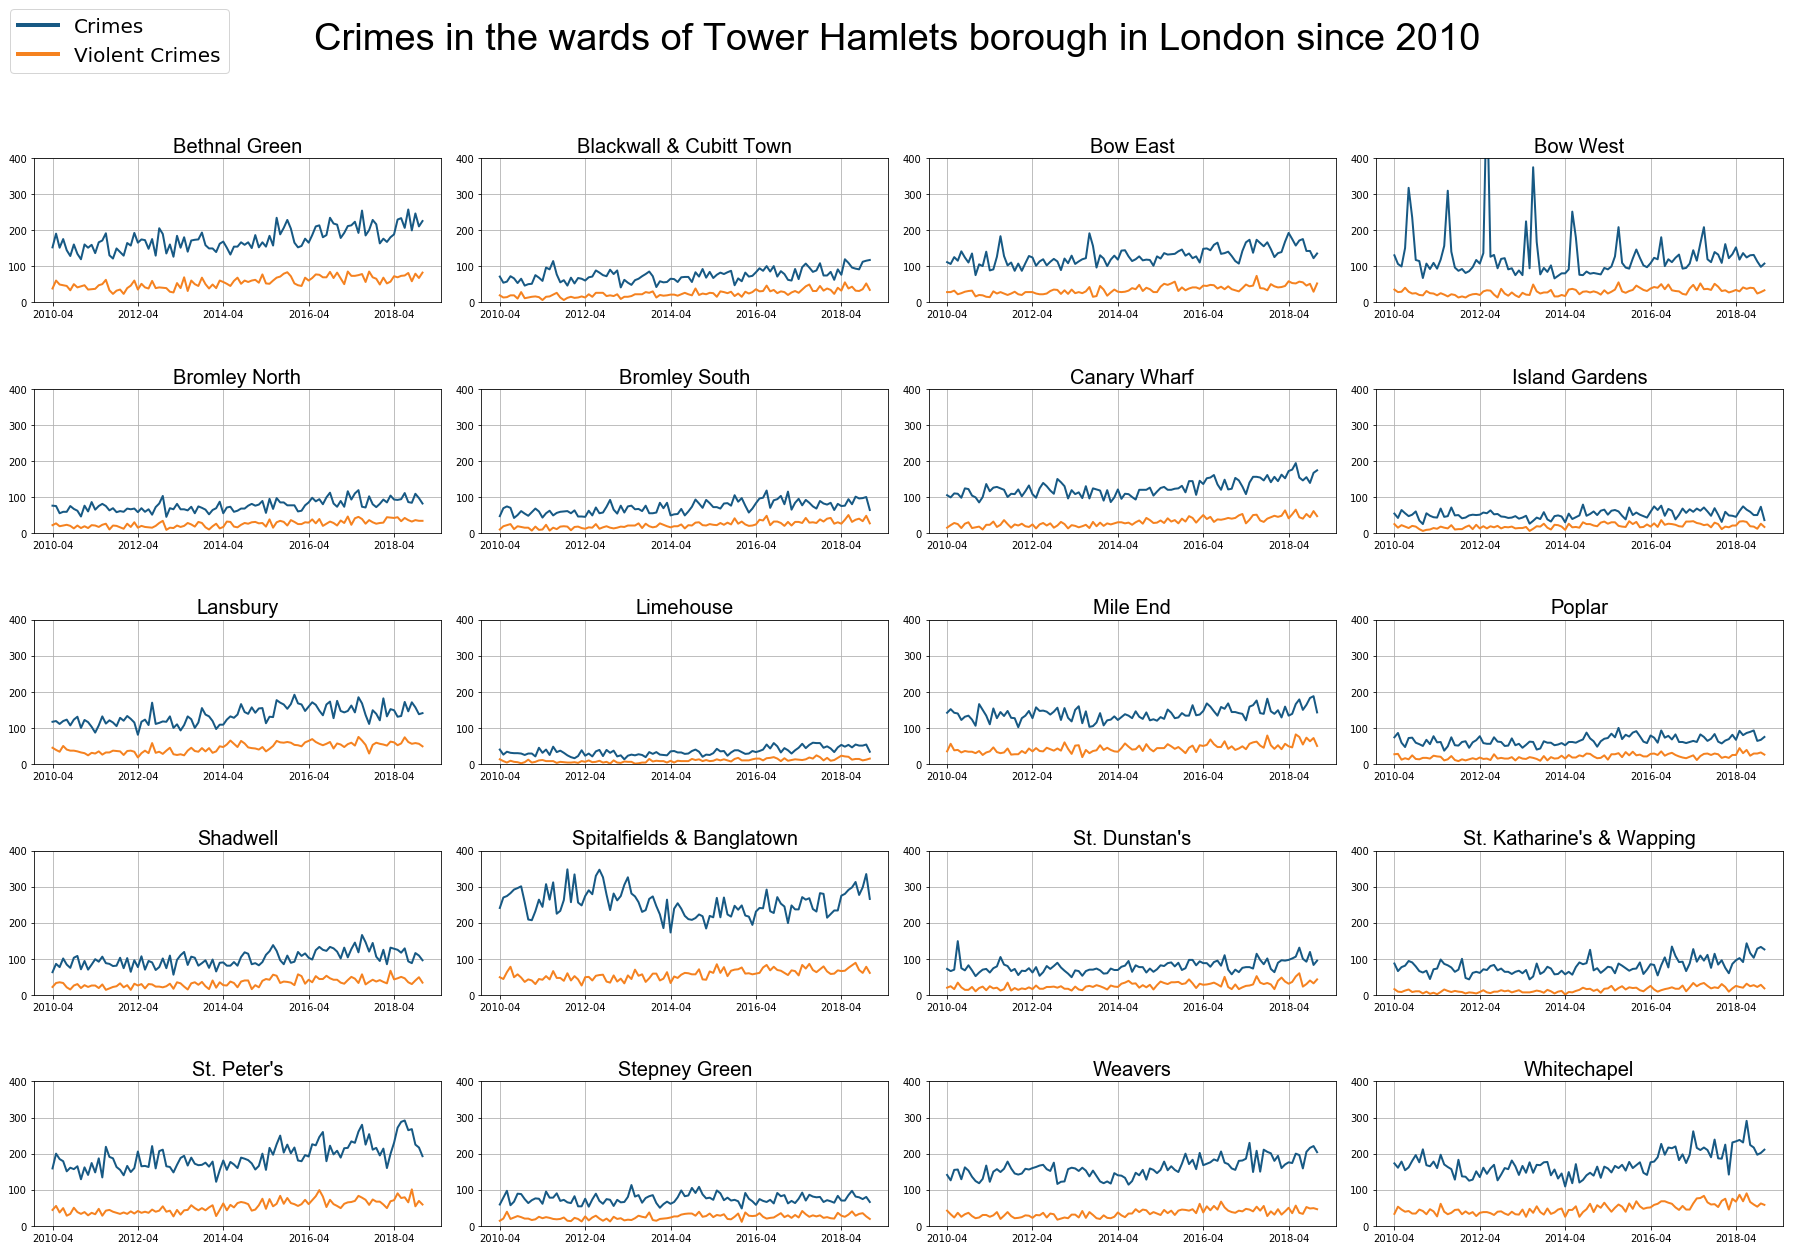

In [36]:
fig = plt.figure(figsize=(25,18))

custom_lines = [Line2D([0], [0], color="#175984", lw=4), # custom lines for the legend
                Line2D([0], [0], color="#F58220", lw=4)]

for i, (name, row) in enumerate(by_ward.iterrows()):
    ax = plt.subplot(5,4, i+1) # create each subplot
    ax.set_title(row.name, fontsize=20, **csfont) # name the subplots  with the ward's name
    ax.plot(by_ward.columns, row, color="#175984", linewidth=2) # plot crimes
    ax.plot(by_ward.columns, violent_rows[i], color = "#F58220", linewidth=2) # plot violent crimes
    ax.xaxis.set_major_locator(ticker.MultipleLocator(24)) # only show every 2 years in x-axis label
    ax.set_ylim(0, 400) # standardized limit for all the plots, only one value is far superior (600) but it would squash the other plots
    ax.grid(True)


fig.legend(custom_lines, ['Crimes', 'Violent Crimes'], fontsize=20, loc='upper left')  # custom legend 
fig.suptitle("Crimes in the wards of Tower Hamlets borough in London since 2010", fontsize=38, **csfont)

fig.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.subplots_adjust(hspace = 0.6) # height between subplots